In [1]:
# Author: Nathan LaPierre
# This script takes the processed results and makes the plots for the Metalign paper
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm
import seaborn as sns
import numpy as np
import pandas as pd
sns.set_context("talk", font_scale=1.0)

In [30]:
cami_timing_mem = pd.read_csv('plot_inputs/cami_timing_memory.txt', sep='\t', index_col=0)
cami_timing_mem

,Wallclock time,CPU time,Max Memory Usage (GB)
Metalign,12.803000,46.522894,40.368536
Kraken2,1.520058,5.133906,43.698348
CLARK,6.713592,13.805333,157.583960
GOTTCHA,9.780608,18.014122,10.525880
MEGAN+DIAMOND,2072.332367,7288.270497,40.362844
MetaBinG2,13.078044,44.399303,1.078700
MetaPhlAn2,14.778192,61.798208,1.568312
mOTUS2,12.251414,49.309878,2.214864


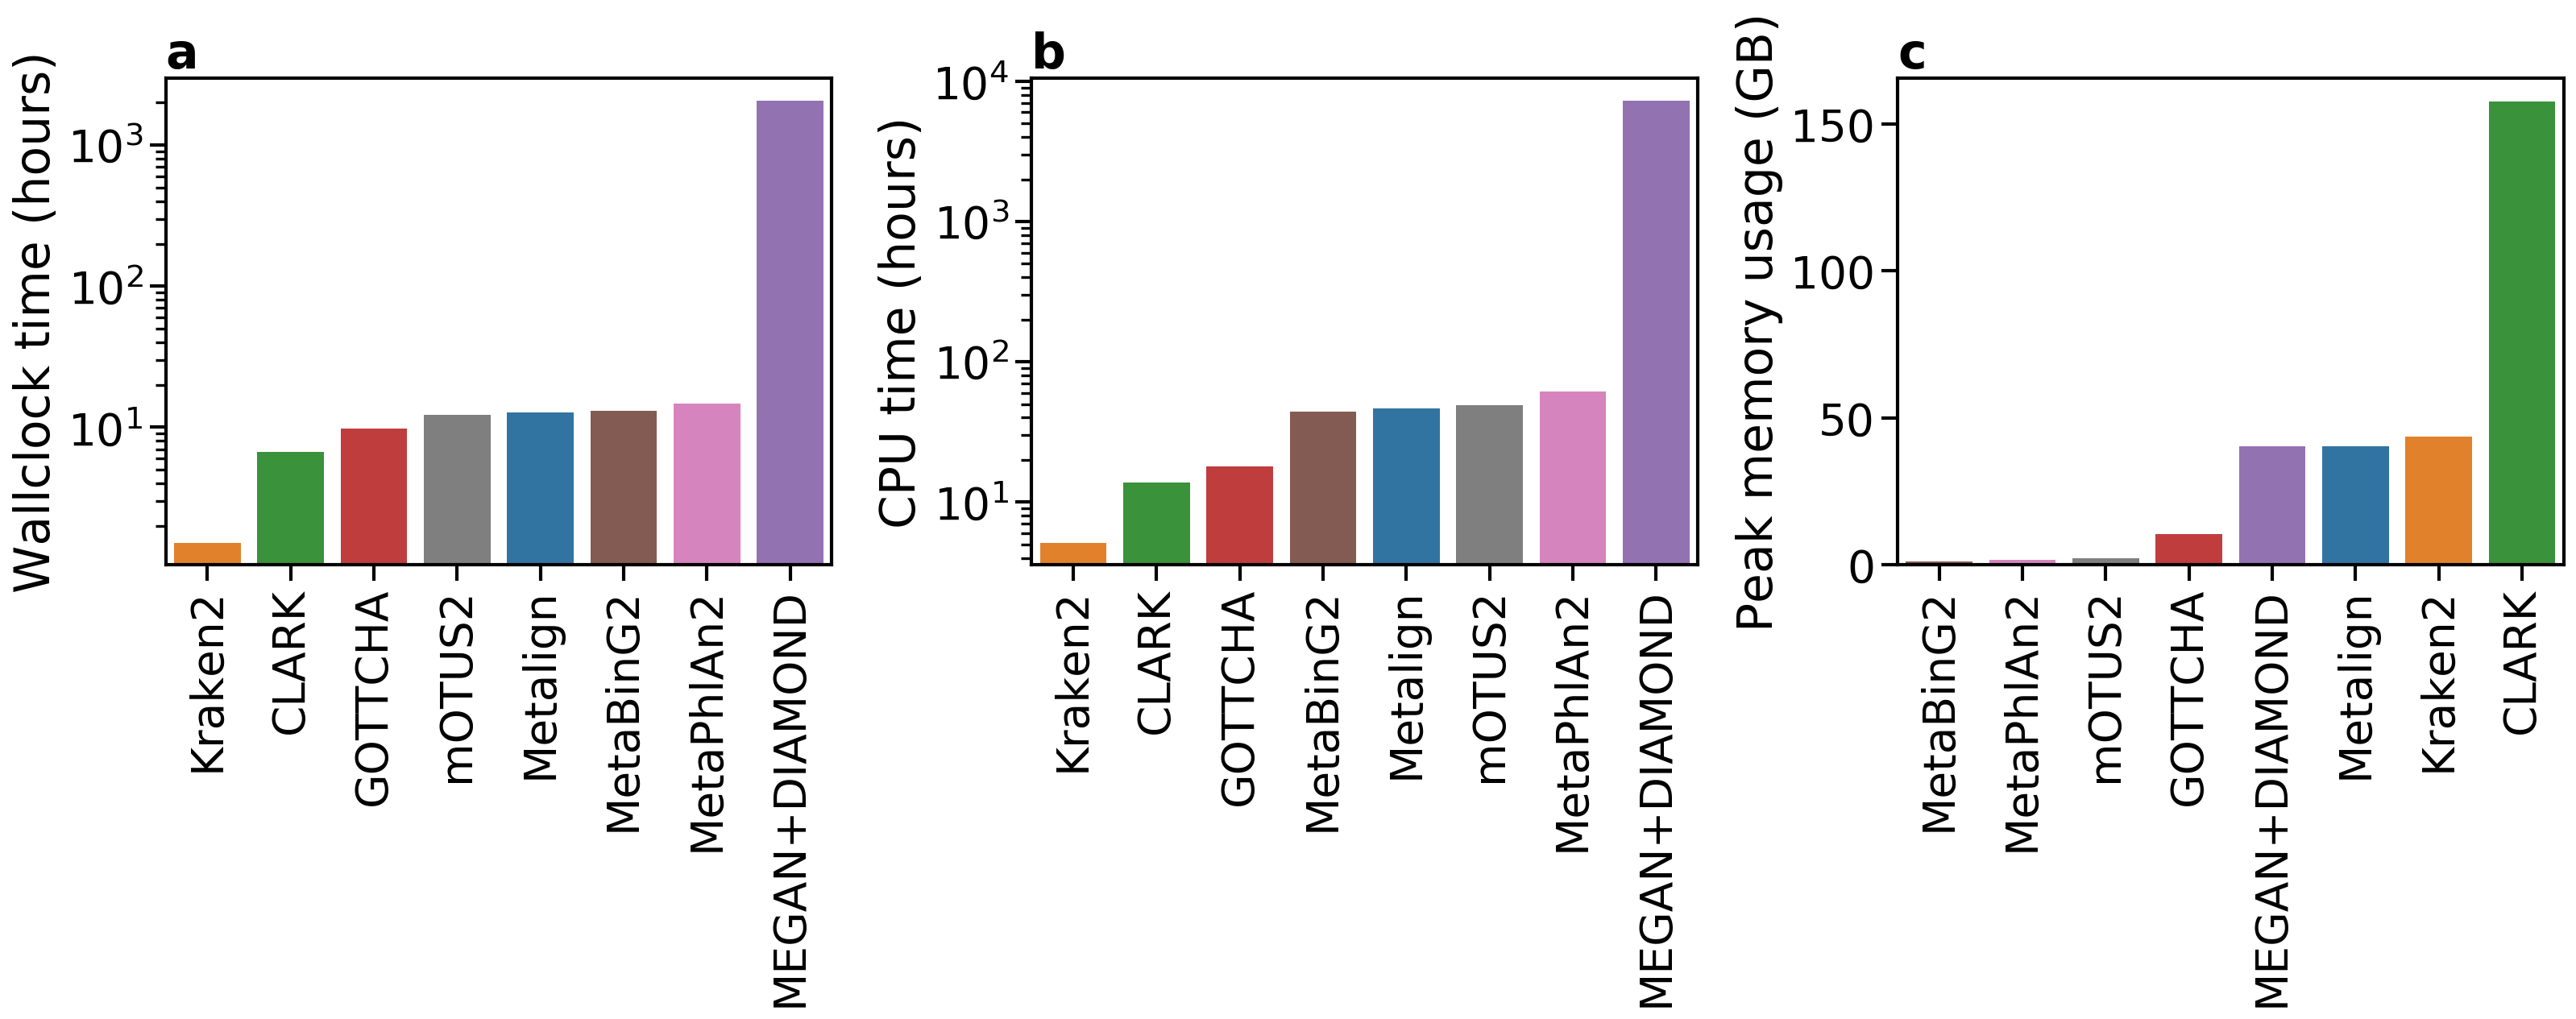

In [41]:
sns.set_context("talk", font_scale=1.5)
figure(num=None, figsize=(24, 5), dpi=160, facecolor='w', edgecolor='k')
plt.subplots_adjust(wspace = 0.3)
methods = list(cami_timing_mem.index)
current_palette = sns.color_palette()
orig_method_order = {'Metalign': 0, 'Kraken2': 1, 'CLARK': 2, 'GOTTCHA': 3, 'MEGAN+DIAMOND': 4,
                    'MetaBinG2': 5, 'MetaPhlAn2': 6, 'mOTUS2': 7}

plt.subplot(1, 3, 1)
order=['Kraken2', 'CLARK', 'GOTTCHA', 'mOTUS2', 'Metalign', 'MetaBinG2', 'MetaPhlAn2', 'MEGAN+DIAMOND']
ordered_palette = [current_palette[orig_method_order[method]] for method in order]
ax = sns.barplot(x=methods, y=cami_timing_mem['Wallclock time'].tolist(), order=order, palette=ordered_palette)
plt.xticks(rotation=90)
plt.yscale('log')
plt.ylabel('Wallclock time (hours)')
ax.set_title('a', loc='left', fontweight='bold')

plt.subplot(1, 3, 2)
order=['Kraken2', 'CLARK', 'GOTTCHA', 'MetaBinG2', 'Metalign', 'mOTUS2', 'MetaPhlAn2', 'MEGAN+DIAMOND']
ordered_palette = [current_palette[orig_method_order[method]] for method in order]
ax = sns.barplot(x=methods, y=cami_timing_mem['CPU time'].tolist(), order=order, palette=ordered_palette)
plt.xticks(rotation=90)
plt.yscale('log')
plt.ylabel('CPU time (hours)')
ax.set_title('b', loc='left', fontweight='bold')

plt.subplot(1, 3, 3)
order=['MetaBinG2', 'MetaPhlAn2', 'mOTUS2', 'GOTTCHA', 'MEGAN+DIAMOND', 'Metalign', 'Kraken2', 'CLARK']
ordered_palette = [current_palette[orig_method_order[method]] for method in order]
ax = sns.barplot(x=methods, y=cami_timing_mem['Max Memory Usage (GB)'].tolist(), order=order, palette=ordered_palette)
plt.xticks(rotation=90)
plt.ylabel('Peak memory usage (GB)')
ax.set_title('c', loc='left', fontweight='bold')

plt.savefig("figures/CAMI1_timing_mem.png", bbox_inches='tight')

In [42]:
def prepare_cami1_metrics_df(df):
    #df['1 - (L1 error / 2)'] = 1 - (df['L1 norm error'] / 2)
    #df['1 - (UniFrac / 14)'] = 1 - (df['Weighted UniFrac error'] / 14)
    df['Scaled\nL1 error'] = 1 - (df['L1 norm error'] / 2)
    df['Scaled\nUniFrac'] = 1 - (df['Weighted UniFrac error'] / 14)
    df = df.rename(columns={'Purity (precision)': 'Precision', 'Completeness (recall)': 'Recall'})
    return df

In [43]:
family_rank_df = pd.read_csv('plot_inputs/family_all_metrics.tsv', sep='\t', index_col=0, header=0)
family_rank_df = prepare_cami1_metrics_df(family_rank_df)
genus_rank_df = pd.read_csv('plot_inputs/genus_all_metrics.tsv', sep='\t', index_col=0, header=0)
genus_rank_df = prepare_cami1_metrics_df(genus_rank_df)
species_rank_df = pd.read_csv('plot_inputs/species_all_metrics.tsv', sep='\t', index_col=0, header=0)
species_rank_df = prepare_cami1_metrics_df(species_rank_df)
all_rank_df = pd.read_csv('plot_inputs/all_all_metrics.tsv', sep='\t', index_col=0, header=0)
all_rank_df = prepare_cami1_metrics_df(all_rank_df)
genus_rank_df

,Precision,Recall,F1 score,Jaccard index,L1 norm error,Weighted UniFrac error,Method,Scaled\nL1 error,Scaled\nUniFrac
Metalign,0.728923,0.841692,0.779130,0.639597,0.536193,8.810562,Metalign,0.731904,0.370674
Bracken+Kraken2,0.075668,0.654875,0.133042,0.072216,1.099944,8.934372,Bracken+Kraken2,0.450028,0.361831
CLARK,0.062138,0.658107,0.111496,0.059687,1.106521,9.018481,CLARK,0.446739,0.355823
GOTTCHA,0.592715,0.234359,0.334510,0.200980,1.729660,11.528175,GOTTCHA,0.135170,0.176559
MEGAN+DIAMOND,0.877116,0.718107,0.787000,0.650344,0.545043,10.244024,MEGAN+DIAMOND,0.727478,0.268284
MetaBinG2,0.619462,0.050232,0.087516,0.046076,1.704202,11.742664,MetaBinG2,0.147899,0.161238
MetaPhlAn2,0.731731,0.330964,0.453344,0.293841,1.453663,10.147136,MetaPhlAn2,0.273169,0.275205
mOTUs2,0.815763,0.808093,0.811296,0.685254,0.469355,8.184031,mOTUs2,0.765323,0.415426


In [62]:
def plot_panel_figure_cami1(family_df, genus_df, species_df, identifier, heatmap_textsize=20):
    figure(num=None, figsize=(16, 24), dpi=160, facecolor='w', edgecolor='k')
    sns.set_context("talk", font_scale=1.25)
    plt.subplots_adjust(hspace = 0.25)
    methods = list(genus_df.index)
    drop_list = ['Method', 'Weighted UniFrac error', 'L1 norm error', 'Jaccard index', 'Scaled\nUniFrac']
    markers = ['*', 's', 'p', 'x', '^', '+', 'o', '<', 'D', 'h', '1', '2']

    # Family level heatmap
    plt.subplot(3, 2, 1)
    ax = sns.heatmap(family_df.drop(labels=drop_list, axis=1), annot=True, annot_kws={"size": heatmap_textsize}, cbar=False)
    ax.set_ylim(float(len(methods)), 0)
    ax.set_title('a', loc='left', fontweight='bold')
    ax.set_ylabel('Family level')
    
    # Family level precision/recall scatterplot
    ax=plt.subplot(3, 2, 2)
    for i in range(len(methods)):
        plt.scatter(family_df['Precision'][methods[i]], family_df['Recall'][methods[i]], 
                    marker=markers[i], label=methods[i], s=150) 
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 1.0, box.height * 1.0])
    #ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.13), ncol=2)
    ax.set(xlabel="Precision", ylabel="Recall")
    ax.set_title('b', loc='left', fontweight='bold')
    
    # Genus level heatmap
    plt.subplot(3, 2, 3)
    ax = sns.heatmap(genus_df.drop(labels=drop_list, axis=1), annot=True, annot_kws={"size": heatmap_textsize}, cbar=False)
    ax.set_ylim(float(len(methods)), 0)
    ax.set_title('c', loc='left', fontweight='bold')
    ax.set_ylabel('Genus level')
    
    # Genus level precision/recall scatterplot
    ax=plt.subplot(3, 2, 4)
    for i in range(len(methods)):
        plt.scatter(genus_df['Precision'][methods[i]], genus_df['Recall'][methods[i]], 
                    marker=markers[i], label=methods[i], s=150) 
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 1.0, box.height * 1.0])
    #ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.13), ncol=2)
    ax.set(xlabel="Precision", ylabel="Recall")
    ax.set_title('d', loc='left', fontweight='bold')
    
    # Species level heatmap
    plt.subplot(3, 2, 5)
    ax = sns.heatmap(species_df.drop(labels=drop_list, axis=1), annot=True, annot_kws={"size": heatmap_textsize}, cbar=False)
    ax.set_ylim(float(len(methods)), 0)
    ax.set_title('e', loc='left', fontweight='bold')
    ax.set_ylabel('Species level')
    
    # Species level precision/recall scatterplot
    ax=plt.subplot(3, 2, 6)
    for i in range(len(methods)):
        plt.scatter(species_df['Precision'][methods[i]], species_df['Recall'][methods[i]], 
                    marker=markers[i], label=methods[i], s=150) 
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 1.0, box.height * 1.0])
    ax.legend(loc='upper center', bbox_to_anchor=(-0.4, -0.13), ncol=4)
    ax.set(xlabel="Precision", ylabel="Recall")
    ax.set_title('f', loc='left', fontweight='bold')
    
    plt.savefig("figures/CAMI1_performance_" + identifier + ".png", bbox_inches='tight')

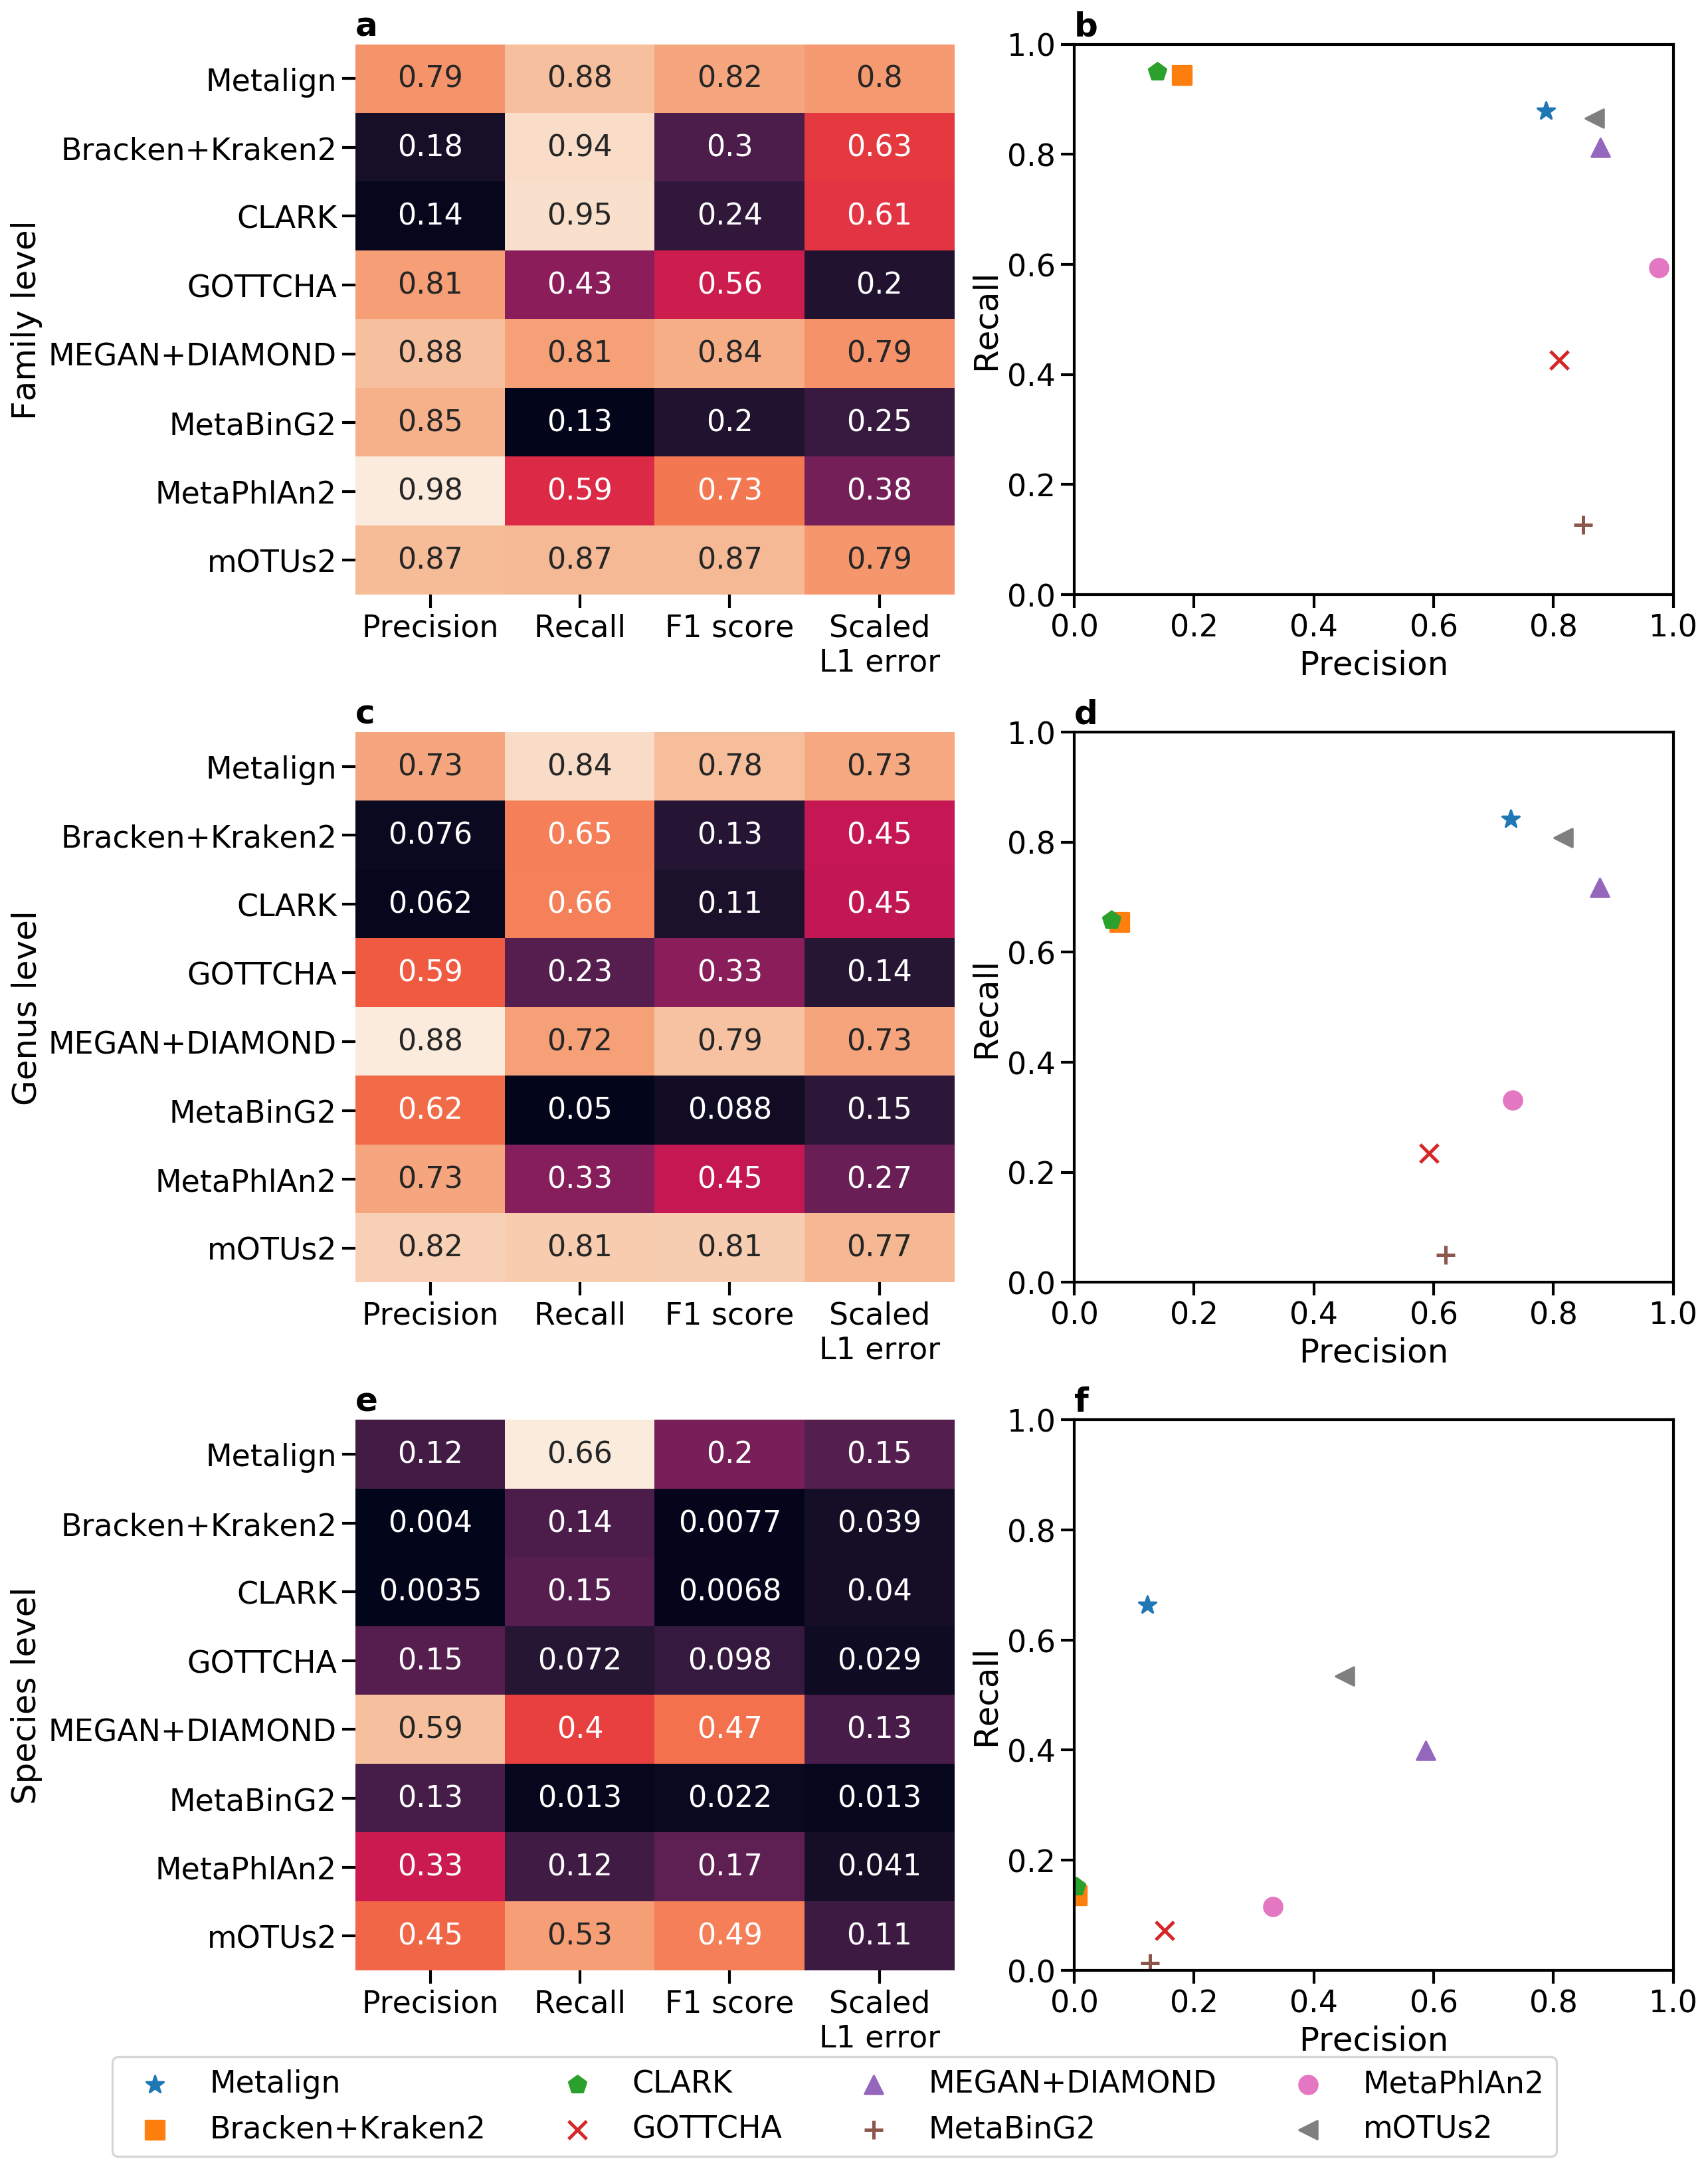

In [63]:
#plot_panel_figure_cami1(genus_rank_df, per_dataset_genus_f1, per_dataset_genus_l1, 'genus')
plot_panel_figure_cami1(family_rank_df, genus_rank_df, species_rank_df, "no_cutoff")

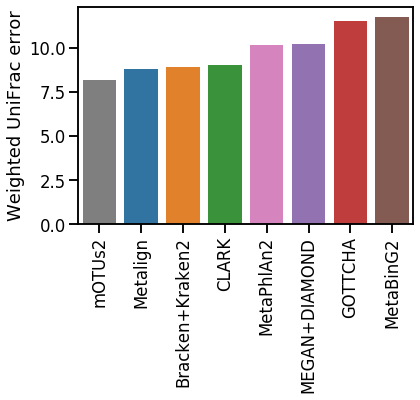

In [57]:
# Plot UniFrac, which is rank-indepdendent
sns.set_context("talk", font_scale=1.0)
methods = list(genus_rank_df.index)
current_palette = sns.color_palette()
orig_method_order = {'Metalign': 0, 'Bracken+Kraken2': 1, 'CLARK': 2, 'GOTTCHA': 3, 'MEGAN+DIAMOND': 4,
                    'MetaBinG2': 5, 'MetaPhlAn2': 6, 'mOTUs2': 7}
order=['mOTUs2', 'Metalign', 'Bracken+Kraken2', 'CLARK', 'MetaPhlAn2', 'MEGAN+DIAMOND', 'GOTTCHA', 'MetaBinG2']
ordered_palette = [current_palette[orig_method_order[method]] for method in order]
ax = sns.barplot(x=methods, y=genus_rank_df['Weighted UniFrac error'].tolist(), order=order, palette=ordered_palette)
plt.xticks(rotation=90)
plt.ylabel('Weighted UniFrac error')
plt.savefig("figures/CAMI1_UniFrac.png", bbox_inches='tight')

In [64]:
family_rank_df_thresh_0pt01pct = pd.read_csv('plot_inputs/family_all_metrics_thresh_0pt01pct.tsv', sep='\t', index_col=0, header=0)
family_rank_df_thresh_0pt01pct = prepare_cami1_metrics_df(family_rank_df_thresh_0pt01pct)
genus_rank_df_thresh_0pt01pct = pd.read_csv('plot_inputs/genus_all_metrics_thresh_0pt01pct.tsv', sep='\t', index_col=0, header=0)
genus_rank_df_thresh_0pt01pct = prepare_cami1_metrics_df(genus_rank_df_thresh_0pt01pct)
species_rank_df_thresh_0pt01pct = pd.read_csv('plot_inputs/species_all_metrics_thresh_0pt01pct.tsv', sep='\t', index_col=0, header=0)
species_rank_df_thresh_0pt01pct = prepare_cami1_metrics_df(species_rank_df_thresh_0pt01pct)
all_rank_df_thresh_0pt01pct = pd.read_csv('plot_inputs/all_all_metrics_thresh_0pt01pct.tsv', sep='\t', index_col=0, header=0)
all_rank_df_thresh_0pt01pct = prepare_cami1_metrics_df(all_rank_df_thresh_0pt01pct)
genus_rank_df_thresh_0pt01pct

,Precision,Recall,F1 score,Jaccard index,L1 norm error,Weighted UniFrac error,Method,Scaled\nL1 error,Scaled\nUniFrac
Metalign,0.816694,0.836882,0.825019,0.704041,0.535896,8.810483,Metalign,0.732052,0.370680
Bracken+Kraken2,0.187205,0.607285,0.275934,0.163817,1.090120,8.959082,Bracken+Kraken2,0.454940,0.360066
CLARK,0.377921,0.527235,0.419052,0.269484,1.089260,9.015410,CLARK,0.455370,0.356042
GOTTCHA,0.592715,0.234359,0.334510,0.200980,1.729660,11.528175,GOTTCHA,0.135170,0.176559
MEGAN+DIAMOND,0.877116,0.718107,0.787000,0.650344,0.545043,10.243574,MEGAN+DIAMOND,0.727478,0.268316
MetaBinG2,0.619462,0.050232,0.087516,0.046076,1.704202,11.742664,MetaBinG2,0.147899,0.161238
MetaPhlAn2,0.746331,0.290934,0.416625,0.263714,1.454261,10.148381,MetaPhlAn2,0.272870,0.275116
mOTUs2,0.841644,0.791259,0.815483,0.691134,0.469404,8.184696,mOTUs2,0.765298,0.415379


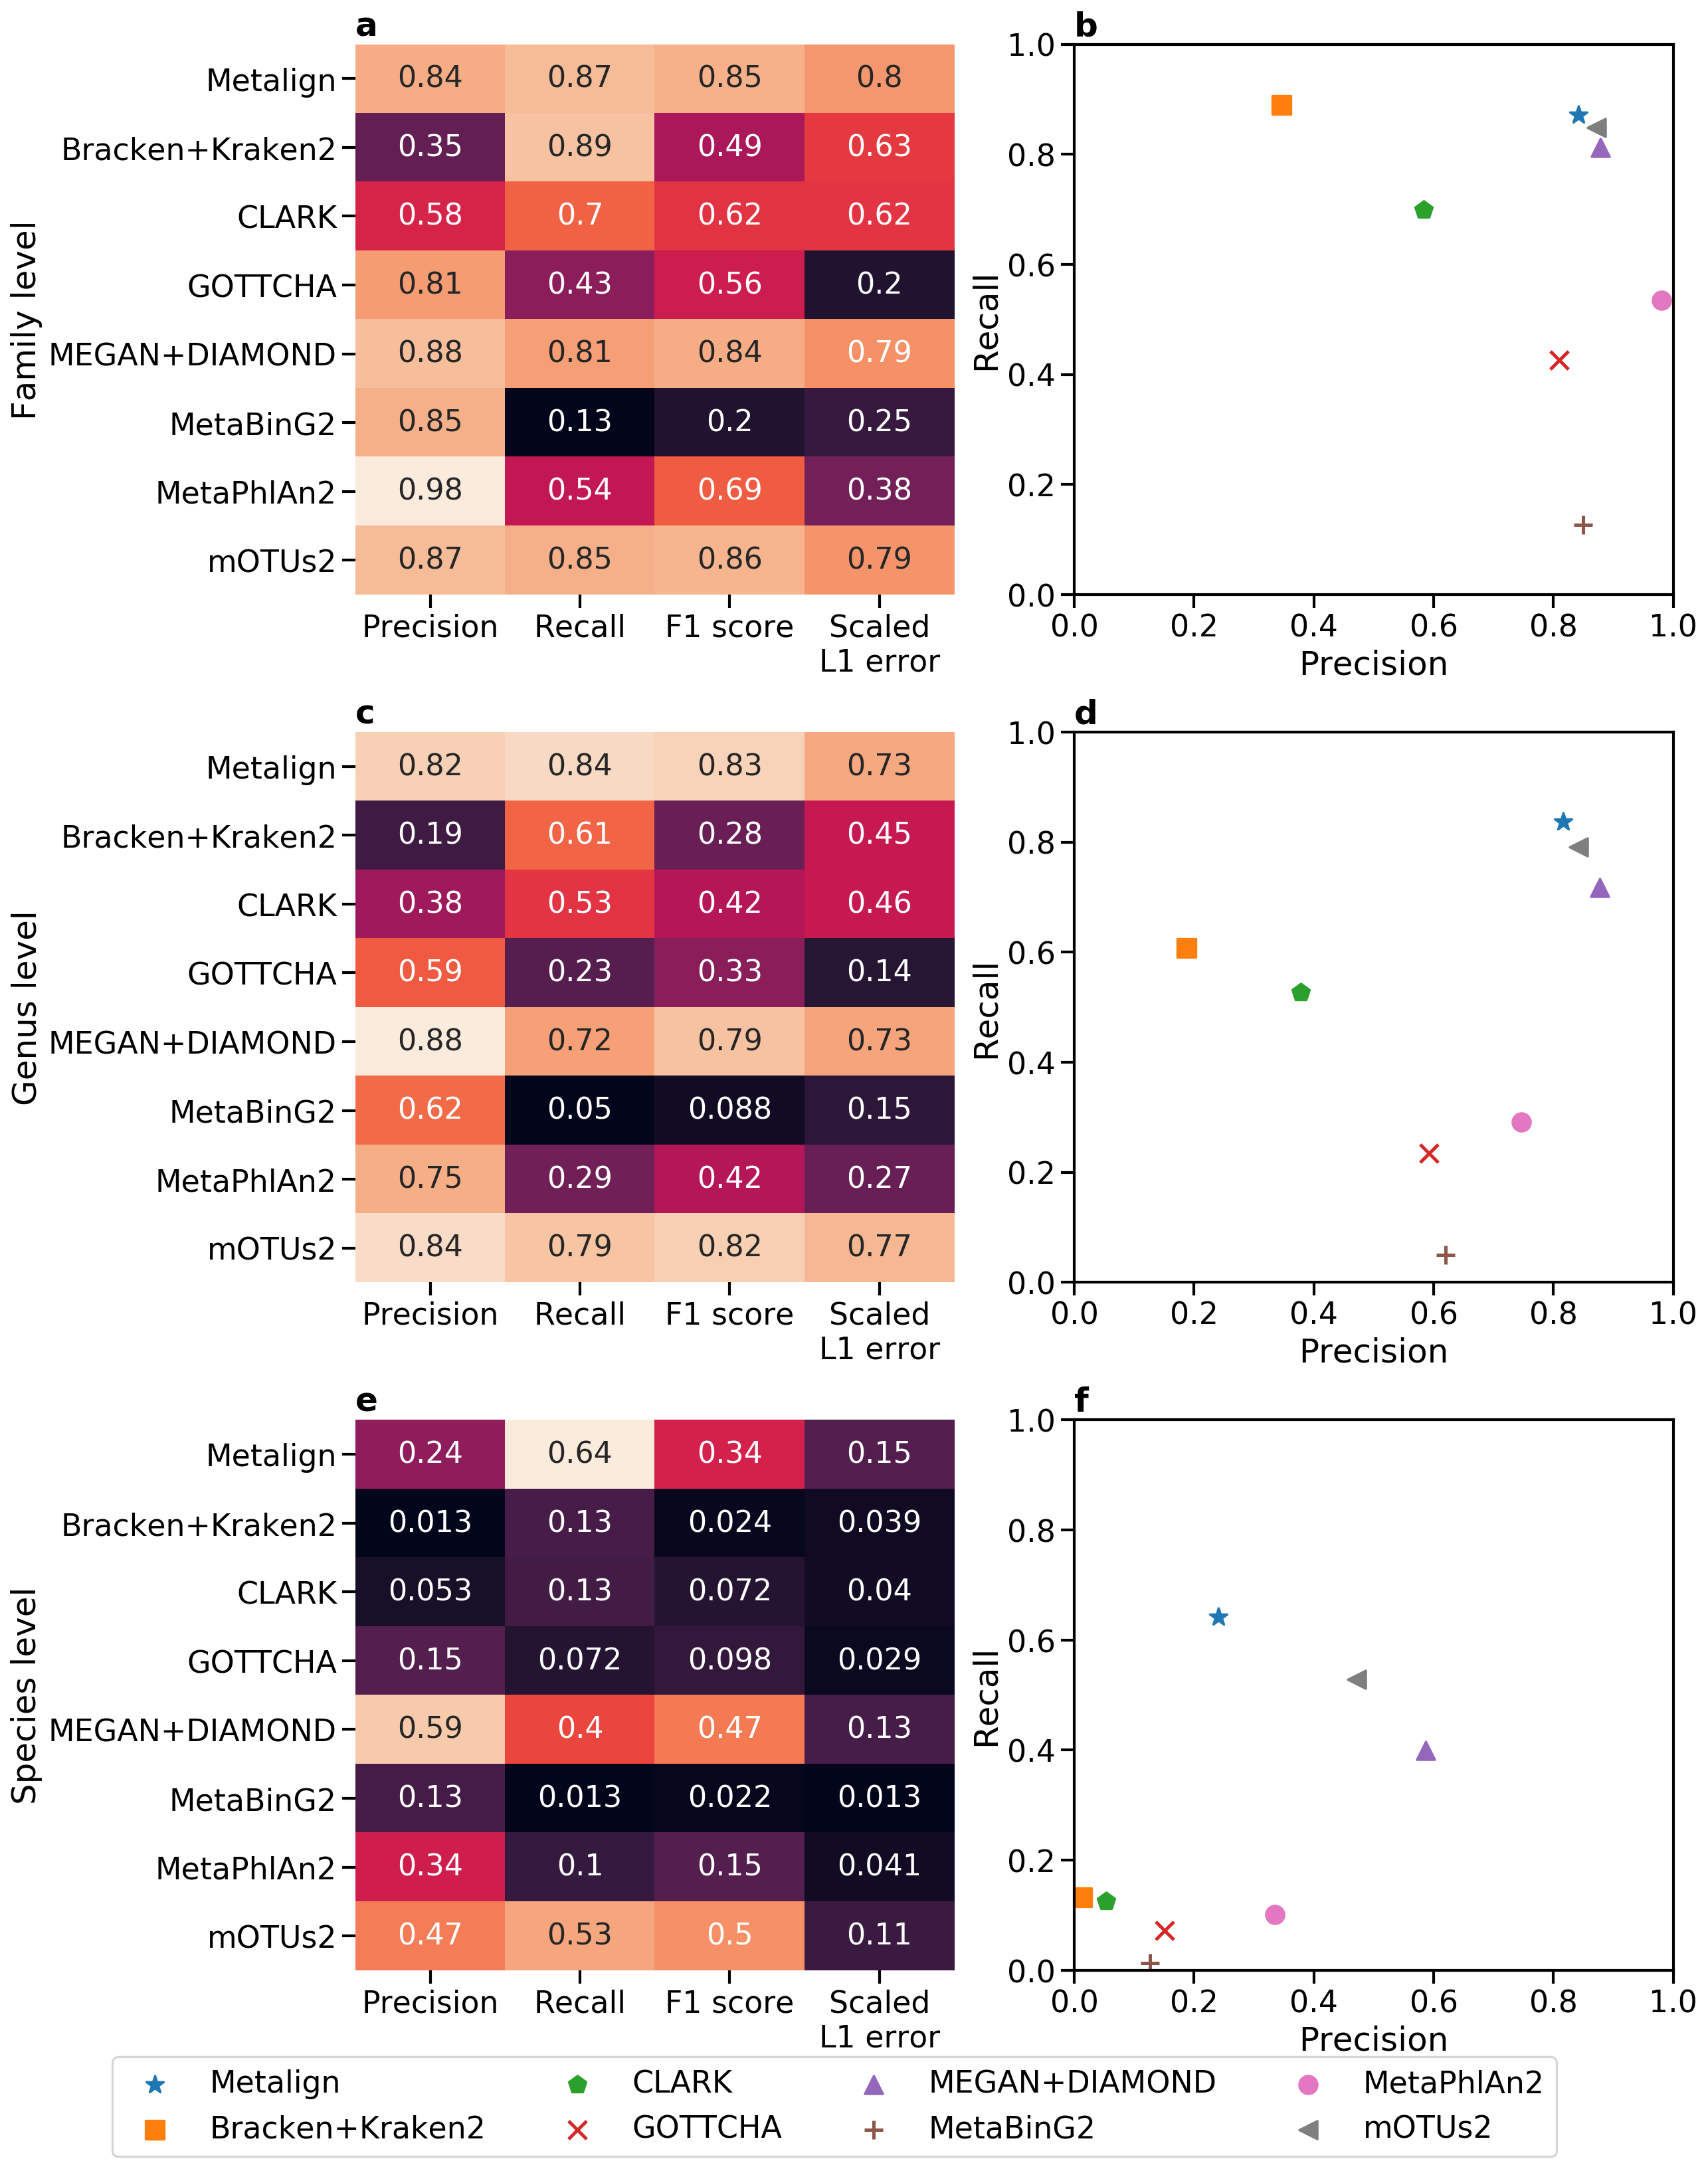

In [65]:
#plot_panel_figure_cami1(genus_rank_df_thresh_0pt01pct, per_dataset_genus_f1_thresh_0pt01pct, per_dataset_genus_l1_thresh_0pt01pct, 'genus_thresh_0pt01pct')
plot_panel_figure_cami1(family_rank_df_thresh_0pt01pct, genus_rank_df_thresh_0pt01pct, species_rank_df_thresh_0pt01pct, "thresh_0pt01pct")


In [66]:
def prepare_mock_df(df):
    df.columns = ['0.01%', '0.1%', '10%', '1%',' 5%', 'None']  # rename cols to cutoff percentages
    cols = df.columns.tolist()
    cols = cols[-1:] + cols[:-1]  # move no cutoff to first column
    cols = cols[:3] + cols[4:] + [cols[3]]  # move 10% cutoff to end
    cols = [cols[0], cols[2], cols[3], cols[4]]  # keep None, 0.1%, 1%, 5%, which are most informative
    df = df[cols]
    return df.T

In [67]:
peabody_f1s_family = pd.read_csv('plot_inputs/peabody_family_f1_per_cutoff.tsv', sep='\t', index_col=0, header=None)
peabody_f1s_family = prepare_mock_df(peabody_f1s_family)
peabody_f1s_genus = pd.read_csv('plot_inputs/peabody_genus_f1_per_cutoff.tsv', sep='\t', index_col=0, header=None)
peabody_f1s_genus = prepare_mock_df(peabody_f1s_genus)
peabody_f1s_all = pd.read_csv('plot_inputs/peabody_all_f1_per_cutoff.tsv', sep='\t', index_col=0, header=None)
peabody_f1s_all = prepare_mock_df(peabody_f1s_all)
peabody_f1s_species = pd.read_csv('plot_inputs/peabody_species_f1_per_cutoff.tsv', sep='\t', index_col=0, header=None)
peabody_f1s_species = prepare_mock_df(peabody_f1s_species)
peabody_f1s_genus

,Metalign,Bracken+Kraken2,CLARK,GOTTCHA,MEGAN+DIAMOND,MetaBinG2,MetaPhlAn2,mOTUs2
None,0.761905,0.046512,0.043956,0.875000,0.727273,0.800000,0.8,0.615385
0.1%,0.888889,0.666667,0.800000,0.875000,0.761905,0.800000,0.8,0.615385
1%,1.000000,0.888889,0.823529,0.875000,0.941176,0.800000,0.8,0.615385
5%,1.000000,1.000000,0.769231,0.615385,0.857143,0.857143,0.8,0.666667


In [34]:
#melted_peabody_f1s_genus = pd.melt(peabody_f1s_genus.reset_index(), id_vars='index')
#melted_peabody_f1s_genus = melted_peabody_f1s_genus.rename(columns={'index': 'Cutoff', 0: 'Method', 'value': 'F1 score'})
#melted_peabody_f1s_genus

In [35]:
#ax = sns.catplot(x="Cutoff", y="F1 score", hue="Method", data=melted_peabody_f1s_genus, height=6, aspect=1.5, kind="bar", palette="muted")
#plt.xticks(rotation=90)
#ax.set(xlabel="Abundance cutoff", ylabel="F1 score")
#plt.savefig("figures/mock_f1_vs_cutoff.png", bbox_inches='tight')

In [111]:
'''f, (ax, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})
markers = ['*', 's', 'p', 'x', '^', '+', 'o', '<', 'D', 'h', '1', '2']

# plot the same data on both axes
ax.plot(peabody_f1s_genus)
ax2.plot(peabody_f1s_genus)
ax.set_ylim(0.5, 1.1)  # most of the data
ax2.set_ylim(0.0, 0.1)  # outliers
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])
for i, line in enumerate(ax2.get_lines()):
    line.set_marker(markers[i])

ax.set_ylabel("F1 score")
ax2.set(xlabel="Abundance cutoff")
handles, labels = ax.get_lines(), peabody_f1s_genus.columns  # plt.gca().get_legend_handles_labels()
#ax.legend(ax.get_lines(), peabody_f1s_genus.columns, loc='center left', bbox_to_anchor=(1, 0.25))
order = [0,1,4,5,6,2,7,3]  # methods ordered in legend by F1 score on the rightmost X tick (5% cutoff)
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='center left', bbox_to_anchor=(1, 0.25))

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax.tick_params(top=False)
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
plt.show()'''
#

'f, (ax, ax2) = plt.subplots(2, 1, gridspec_kw={\'height_ratios\': [3, 1]})\nmarkers = [\'*\', \'s\', \'p\', \'x\', \'^\', \'+\', \'o\', \'<\', \'D\', \'h\', \'1\', \'2\']\n\n# plot the same data on both axes\nax.plot(peabody_f1s_genus)\nax2.plot(peabody_f1s_genus)\nax.set_ylim(0.5, 1.1)  # most of the data\nax2.set_ylim(0.0, 0.1)  # outliers\nfor i, line in enumerate(ax.get_lines()):\n    line.set_marker(markers[i])\nfor i, line in enumerate(ax2.get_lines()):\n    line.set_marker(markers[i])\n\nax.set_ylabel("F1 score")\nax2.set(xlabel="Abundance cutoff")\nhandles, labels = ax.get_lines(), peabody_f1s_genus.columns  # plt.gca().get_legend_handles_labels()\n#ax.legend(ax.get_lines(), peabody_f1s_genus.columns, loc=\'center left\', bbox_to_anchor=(1, 0.25))\norder = [0,1,4,5,6,2,7,3]  # methods ordered in legend by F1 score on the rightmost X tick (5% cutoff)\nax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc=\'center left\', bbox_to_anchor=(1, 0.25))\n\n# hi

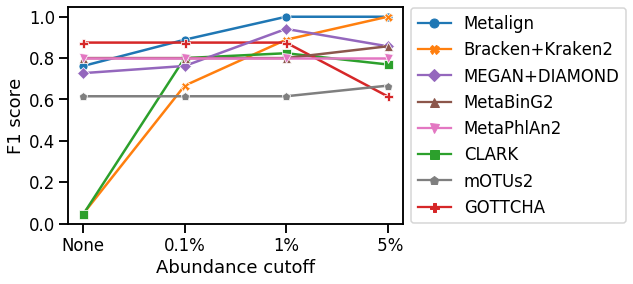

In [68]:
sns.set_context("talk", font_scale=1.0)
ax = sns.lineplot(data=peabody_f1s_genus, linewidth=2.5, sort=False, dashes=False, markers=True)
ax.set(xlabel="Abundance cutoff", ylabel="F1 score")
#ax.set_ylim(0.5, 1.1)
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,4,5,6,2,7,3]  # methods ordered in legend by F1 score on the rightmost X tick (5% cutoff)
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig("figures/mock_f1_vs_cutoff.png", bbox_inches='tight')

In [69]:
real_wallclock_timing = pd.read_csv('plot_inputs/real_data_wallclock_time.txt', sep='\t', index_col=0).T
real_wallclock_timing

,Metalign,Kraken2,CLARK,GOTTCHA,MEGAN+DIAMOND,MetaBinG2,MetaPhlAn2,mOTUs2
0.1,0.470500,0.064242,0.166822,0.047853,5.188119,0.010092,0.030406,0.013961
11,0.378681,0.051597,0.191058,0.908003,47.364222,0.633333,0.666231,0.364767
98,2.707389,0.409136,1.226547,7.068131,NaN,5.826608,5.359267,3.821142


In [70]:
real_cpu_timing = pd.read_csv('plot_inputs/real_data_cpu_time.txt', sep='\t', index_col=0).T
real_cpu_timing

,Metalign,Kraken2,CLARK,GOTTCHA,MEGAN+DIAMOND,MetaBinG2,MetaPhlAn2,mOTUs2
0.1,0.308914,0.028369,0.112917,0.061936,16.186783,0.029797,0.046069,0.038778
11,0.899875,0.162961,0.465594,1.713978,169.184019,1.915503,2.710664,1.465358
98,11.333953,1.420464,3.925897,13.518231,NaN,18.625494,22.530008,15.471547


In [71]:
real_memory = pd.read_csv('plot_inputs/real_data_memory.txt', sep='\t', index_col=0).T
real_memory

,Metalign,Kraken2,CLARK,GOTTCHA,MEGAN+DIAMOND,MetaBinG2,MetaPhlAn2,mOTUs2
0.1,38.825136,42.250712,125.759208,10.526840,22.597880,1.239172,1.240404,2.106148
11,36.695492,42.416764,137.433328,10.697600,20.921288,1.071892,1.390892,2.225024
98,41.495000,43.799996,176.210116,10.615212,NaN,1.071228,1.508576,2.218760


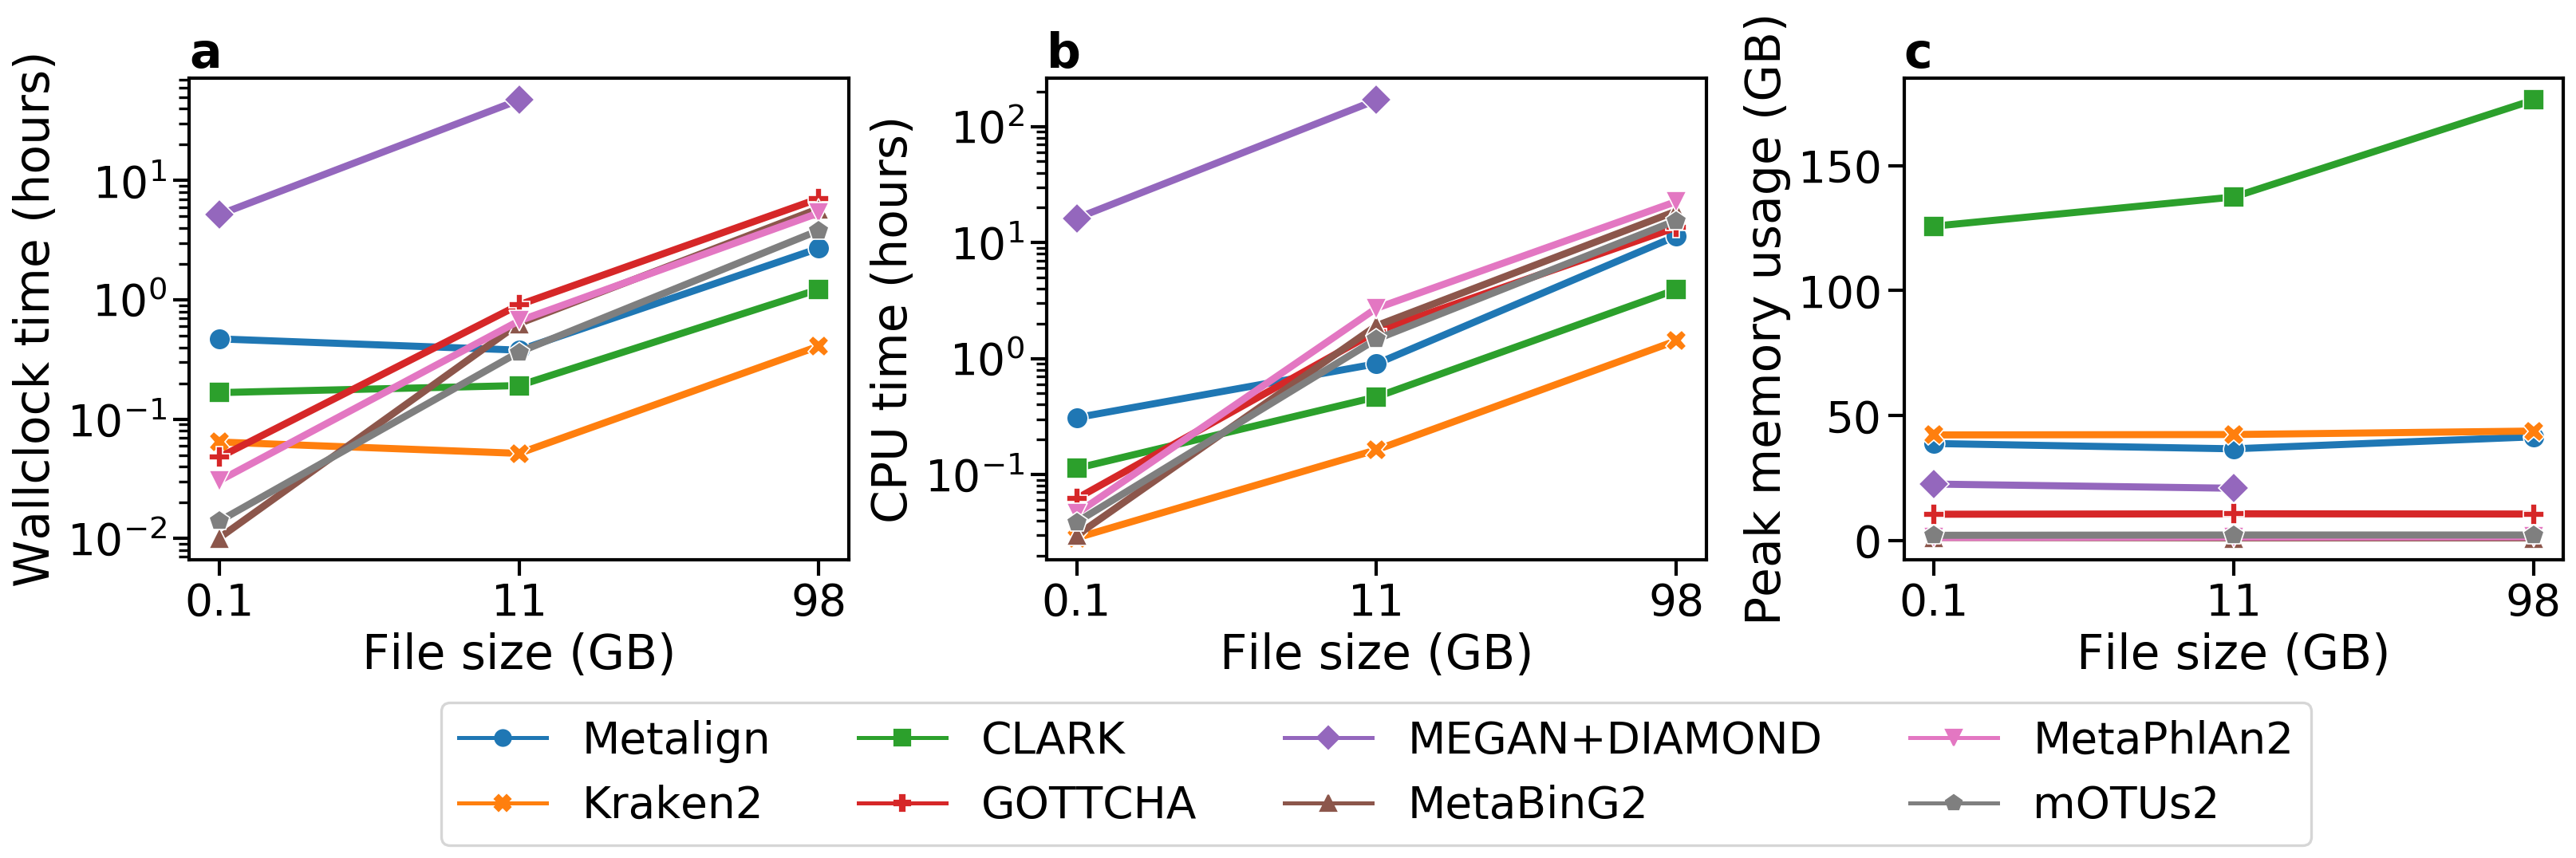

In [88]:
sns.set_context("talk", font_scale=1.5)
figure(num=None, figsize=(24, 5), dpi=160, facecolor='w', edgecolor='k')
plt.subplots_adjust(wspace = 0.3)

plt.subplot(1, 3, 1)
ax = sns.lineplot(data=real_wallclock_timing, linewidth=4, markersize=12, sort=False, dashes=False, markers=True)
ax.set(xlabel="File size (GB)", ylabel="Wallclock time (hours)")
plt.yscale('log')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.get_legend().remove()
ax.set_title('a', loc='left', fontweight='bold')

plt.subplot(1, 3, 2)
ax = sns.lineplot(data=real_cpu_timing, linewidth=4, markersize=12, sort=False, dashes=False, markers=True)
ax.set(xlabel="File size (GB)", ylabel="CPU time (hours)")
plt.yscale('log')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax.get_legend().remove()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.0, box.height * 1.0])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=4)
ax.set_title('b', loc='left', fontweight='bold')

plt.subplot(1, 3, 3)
ax = sns.lineplot(data=real_memory, linewidth=4, markersize=12, sort=False, dashes=False, markers=True)
ax.set(xlabel="File size (GB)", ylabel="Peak memory usage (GB)")
#plt.yscale('log')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.get_legend().remove()
ax.set_title('c', loc='left', fontweight='bold')

plt.savefig("figures/real_data_timing_memory.png", bbox_inches='tight')

In [76]:
custom_kraken2_family_rank_df = pd.read_csv('plot_inputs/custom_kraken2_family_all_metrics.tsv', sep='\t', index_col=0, header=0)
custom_kraken2_family_rank_df = prepare_cami1_metrics_df(custom_kraken2_family_rank_df)
custom_kraken2_genus_rank_df = pd.read_csv('plot_inputs/custom_kraken2_genus_all_metrics.tsv', sep='\t', index_col=0, header=0)
custom_kraken2_genus_rank_df = prepare_cami1_metrics_df(custom_kraken2_genus_rank_df)
custom_kraken2_species_rank_df = pd.read_csv('plot_inputs/custom_kraken2_species_all_metrics.tsv', sep='\t', index_col=0, header=0)
custom_kraken2_species_rank_df = prepare_cami1_metrics_df(custom_kraken2_species_rank_df)
custom_kraken2_all_rank_df = pd.read_csv('plot_inputs/custom_kraken2_all_all_metrics.tsv', sep='\t', index_col=0, header=0)
custom_kraken2_all_rank_df = prepare_cami1_metrics_df(custom_kraken2_all_rank_df)
custom_kraken2_genus_rank_df

,Precision,Recall,F1 score,Jaccard index,L1 norm error,Weighted UniFrac error,Method,Scaled\nL1 error,Scaled\nUniFrac
Metalign,0.728923,0.841692,0.779130,0.639597,0.536193,8.810562,Metalign,0.731904,0.370674
Bracken_custom,0.226141,0.969589,0.357221,0.223836,0.504281,7.789777,Bracken_custom,0.747859,0.443587
Bracken_original,0.075668,0.654875,0.133042,0.072216,1.099944,8.934372,Bracken_original,0.450028,0.361831


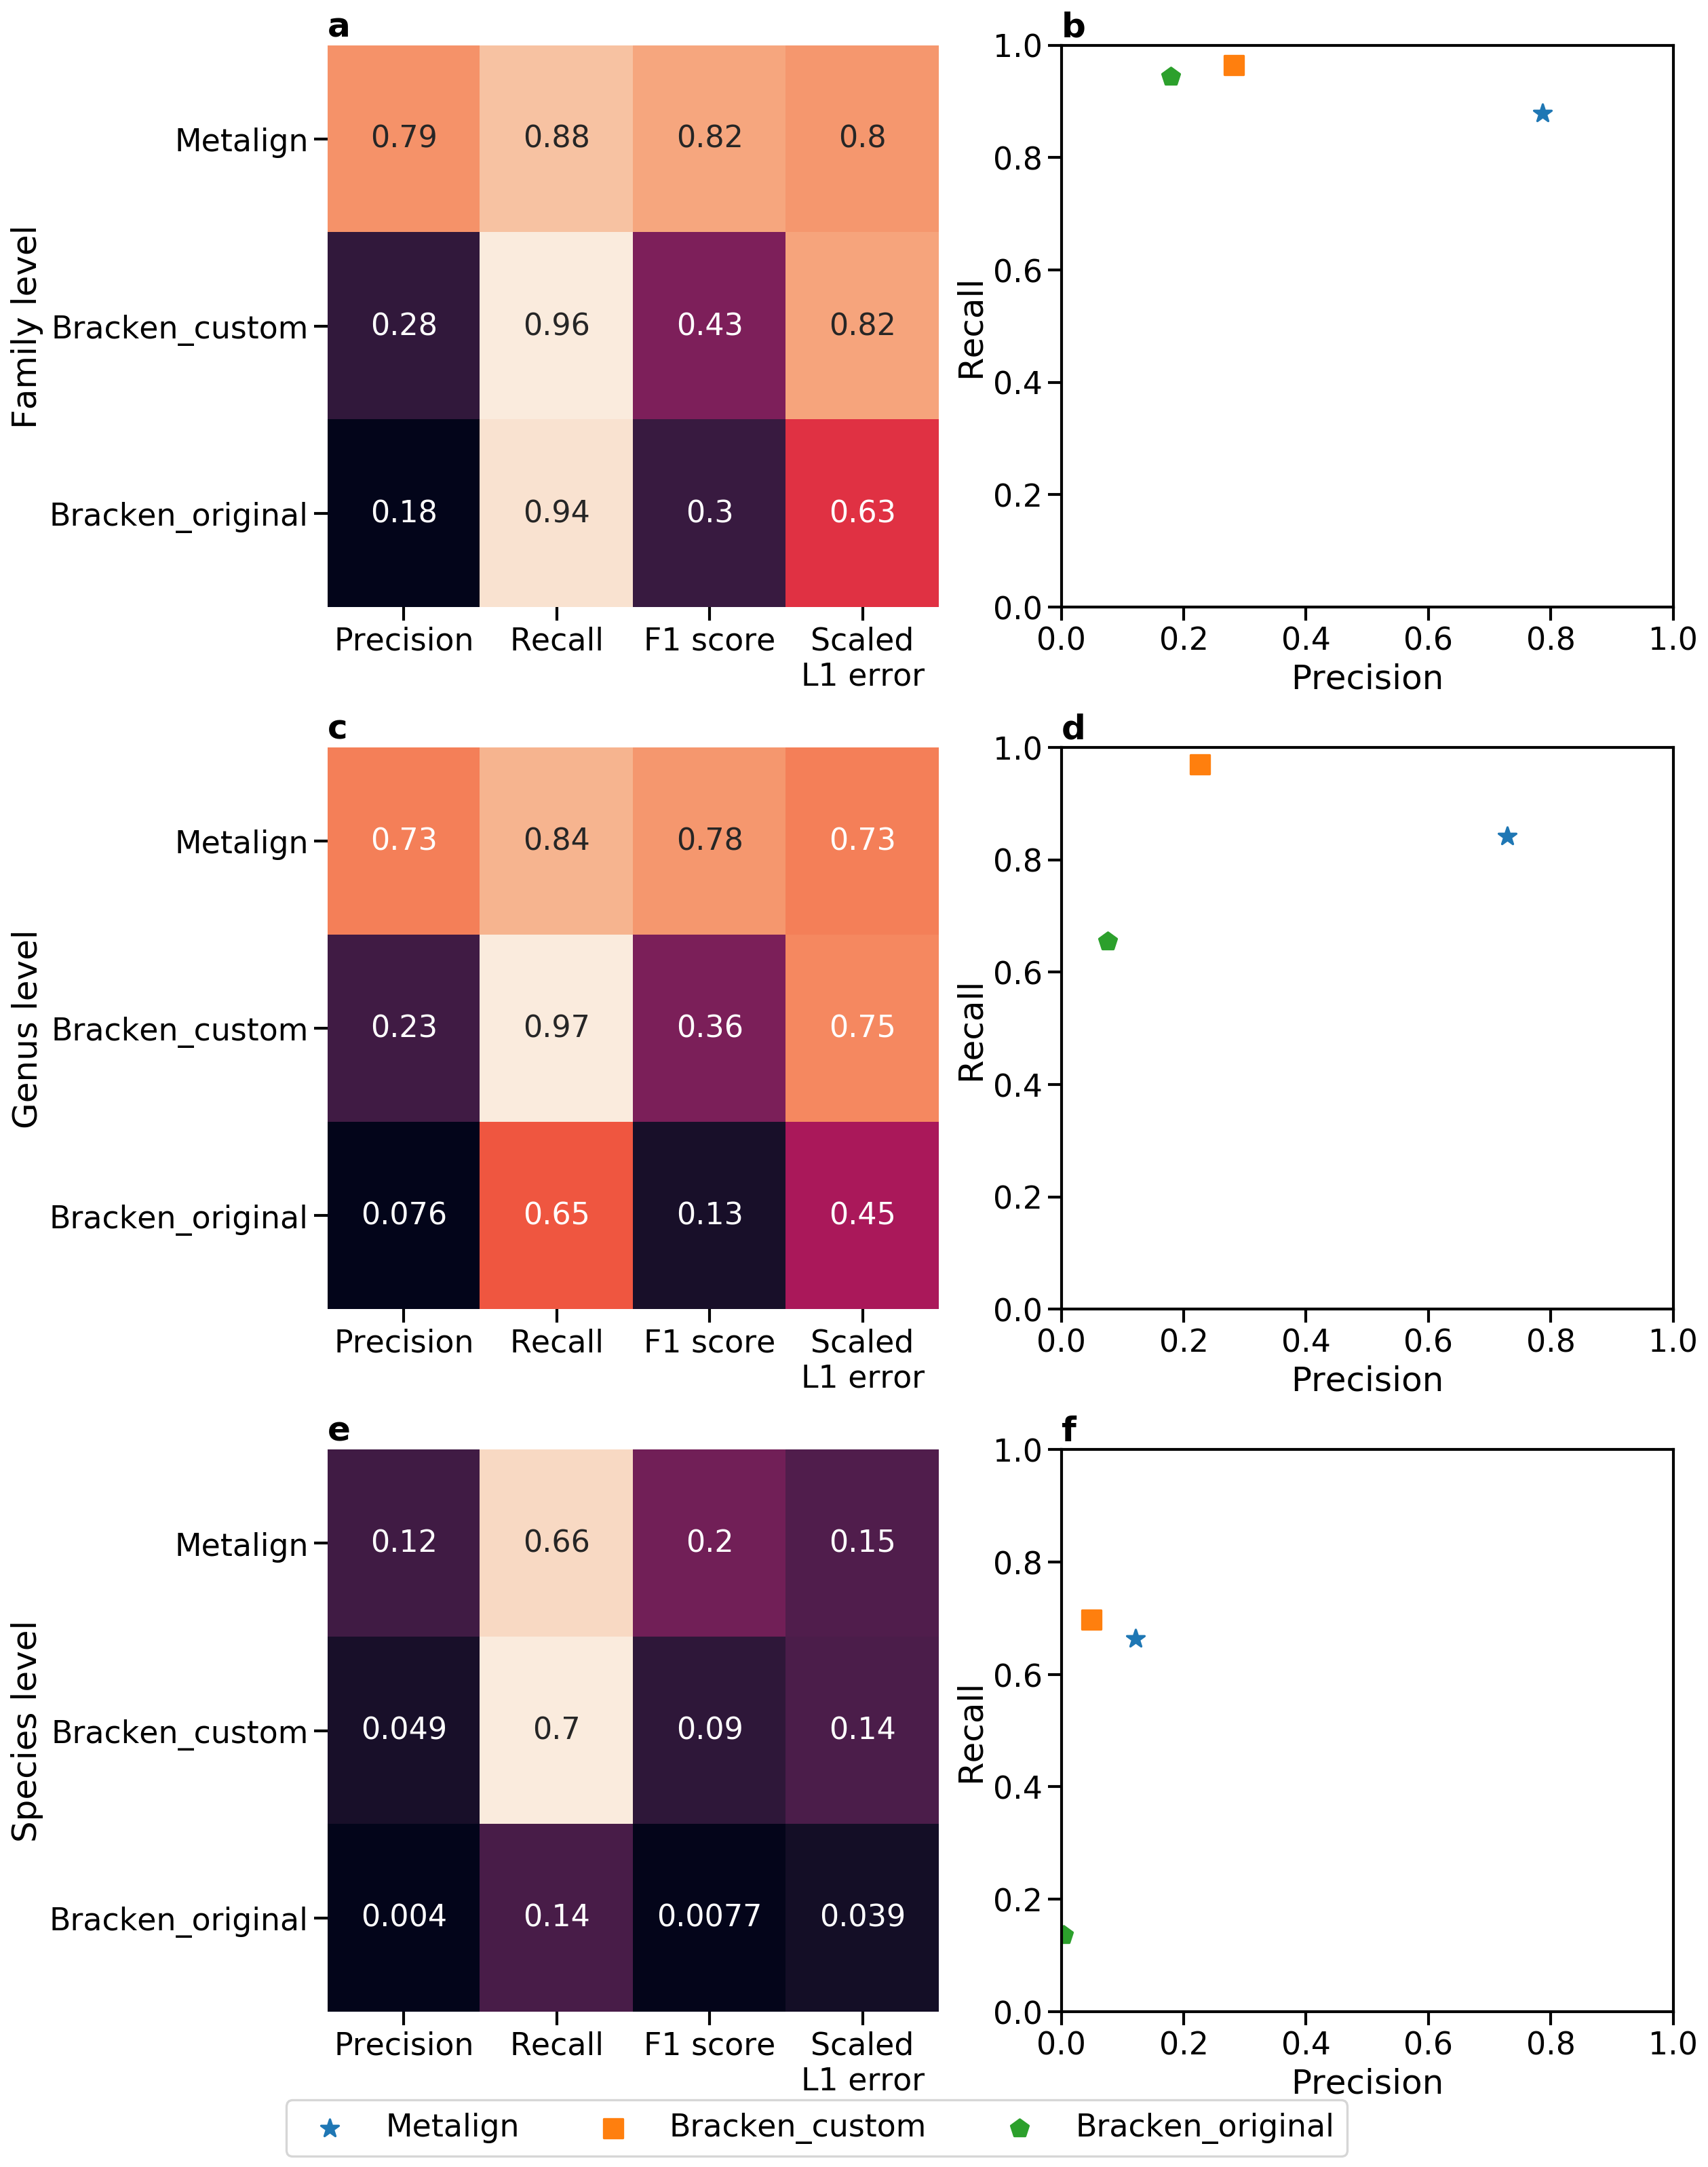

In [77]:
plot_panel_figure_cami1(custom_kraken2_family_rank_df, custom_kraken2_genus_rank_df, custom_kraken2_species_rank_df, "custom_kraken2_no_cutoff")


In [78]:
custom_kraken2_family_rank_df_thresh_0pt01pct = pd.read_csv('plot_inputs/custom_kraken2_family_all_metrics_thresh_0pt01pct.tsv', sep='\t', index_col=0, header=0)
custom_kraken2_family_rank_df_thresh_0pt01pct = prepare_cami1_metrics_df(custom_kraken2_family_rank_df_thresh_0pt01pct)
custom_kraken2_genus_rank_df_thresh_0pt01pct = pd.read_csv('plot_inputs/custom_kraken2_genus_all_metrics_thresh_0pt01pct.tsv', sep='\t', index_col=0, header=0)
custom_kraken2_genus_rank_df_thresh_0pt01pct = prepare_cami1_metrics_df(custom_kraken2_genus_rank_df_thresh_0pt01pct)
custom_kraken2_species_rank_df_thresh_0pt01pct = pd.read_csv('plot_inputs/custom_kraken2_species_all_metrics_thresh_0pt01pct.tsv', sep='\t', index_col=0, header=0)
custom_kraken2_species_rank_df_thresh_0pt01pct = prepare_cami1_metrics_df(custom_kraken2_species_rank_df_thresh_0pt01pct)
custom_kraken2_all_rank_df_thresh_0pt01pct = pd.read_csv('plot_inputs/custom_kraken2_all_all_metrics_thresh_0pt01pct.tsv', sep='\t', index_col=0, header=0)
custom_kraken2_all_rank_df_thresh_0pt01pct = prepare_cami1_metrics_df(custom_kraken2_all_rank_df_thresh_0pt01pct)
custom_kraken2_genus_rank_df_thresh_0pt01pct

,Precision,Recall,F1 score,Jaccard index,L1 norm error,Weighted UniFrac error,Method,Scaled\nL1 error,Scaled\nUniFrac
Metalign,0.816694,0.836882,0.825019,0.704041,0.535896,8.810483,Metalign,0.732052,0.370680
Bracken_custom,0.634657,0.903477,0.735456,0.590772,0.497493,7.789631,Bracken_custom,0.751253,0.443598
Bracken_original,0.187205,0.607285,0.275934,0.163817,1.090120,8.959082,Bracken_original,0.454940,0.360066


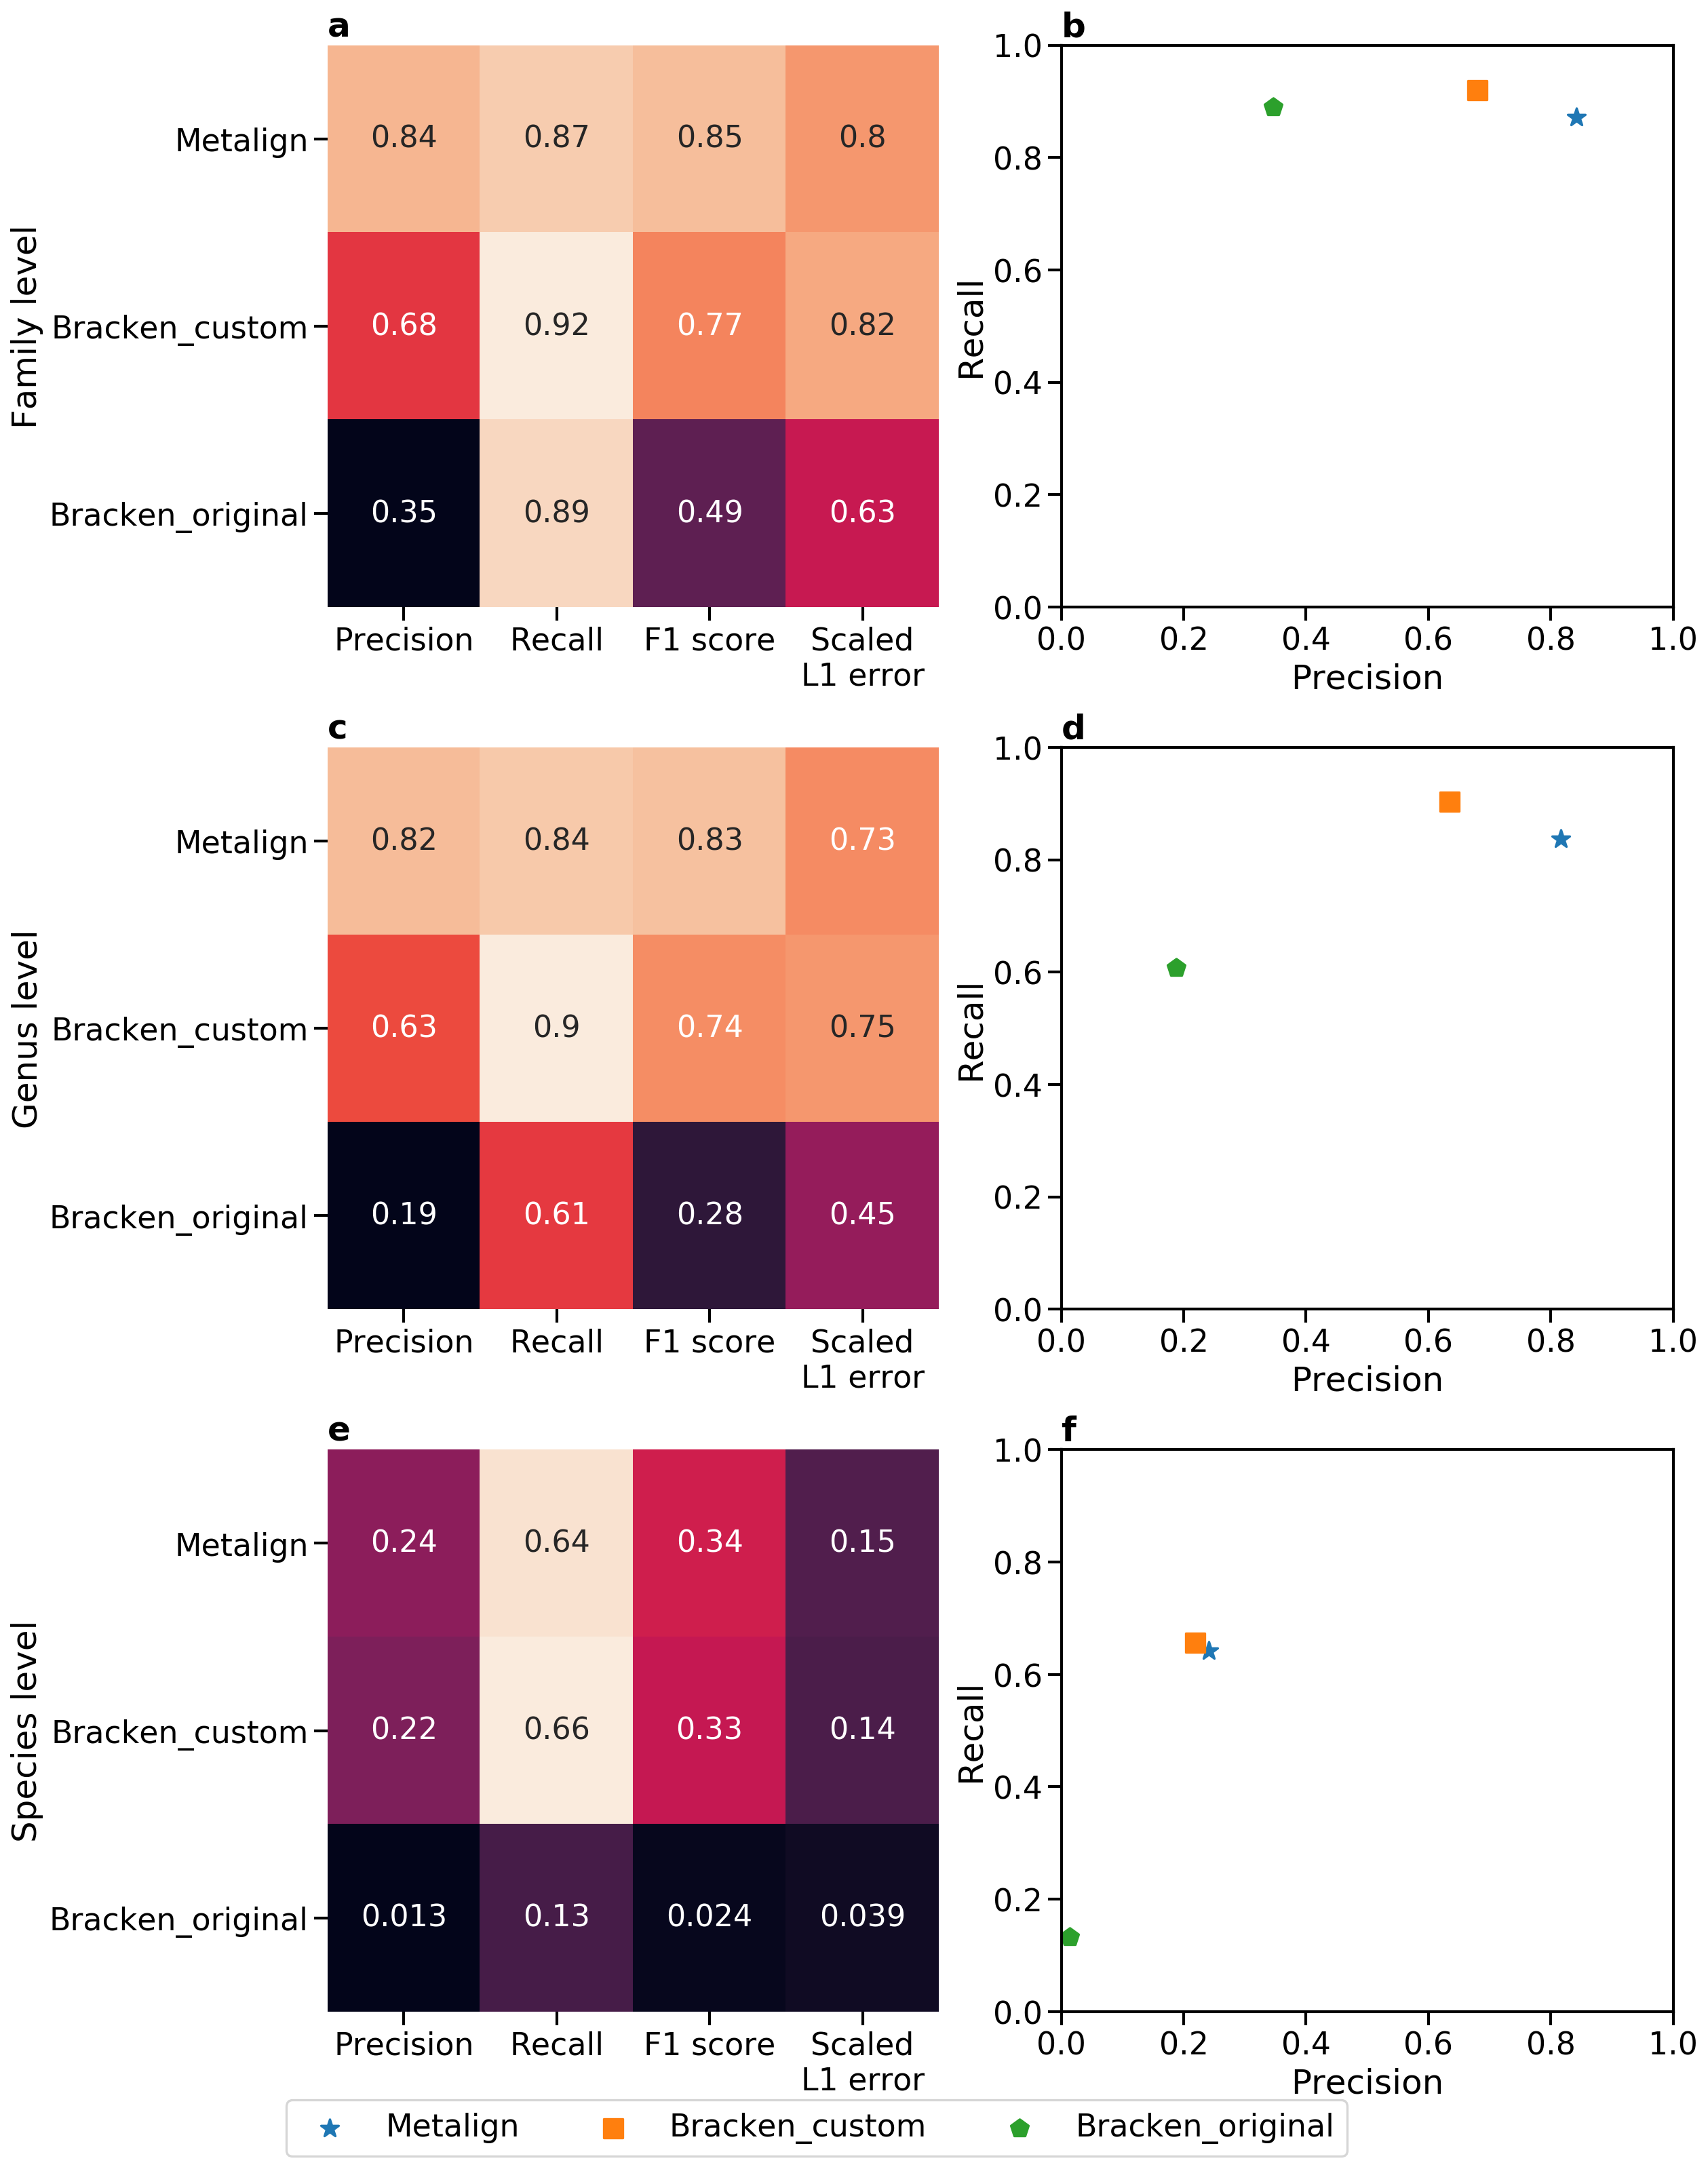

In [79]:
plot_panel_figure_cami1(custom_kraken2_family_rank_df_thresh_0pt01pct, custom_kraken2_genus_rank_df_thresh_0pt01pct, custom_kraken2_species_rank_df_thresh_0pt01pct, "custom_kraken2_thresh_0pt01pct")


In [80]:
custom_timing_mem = pd.read_csv('plot_inputs/custom_timing_memory.txt', sep='\t', index_col=0)
custom_timing_mem

,Wallclock time,CPU time,Max Memory Usage (GB)
Metalign,12.803000,46.522894,40.368536
Kraken2_original,1.520058,5.133906,43.698348
Kraken2_custom,0.583775,7.326742,325.230676


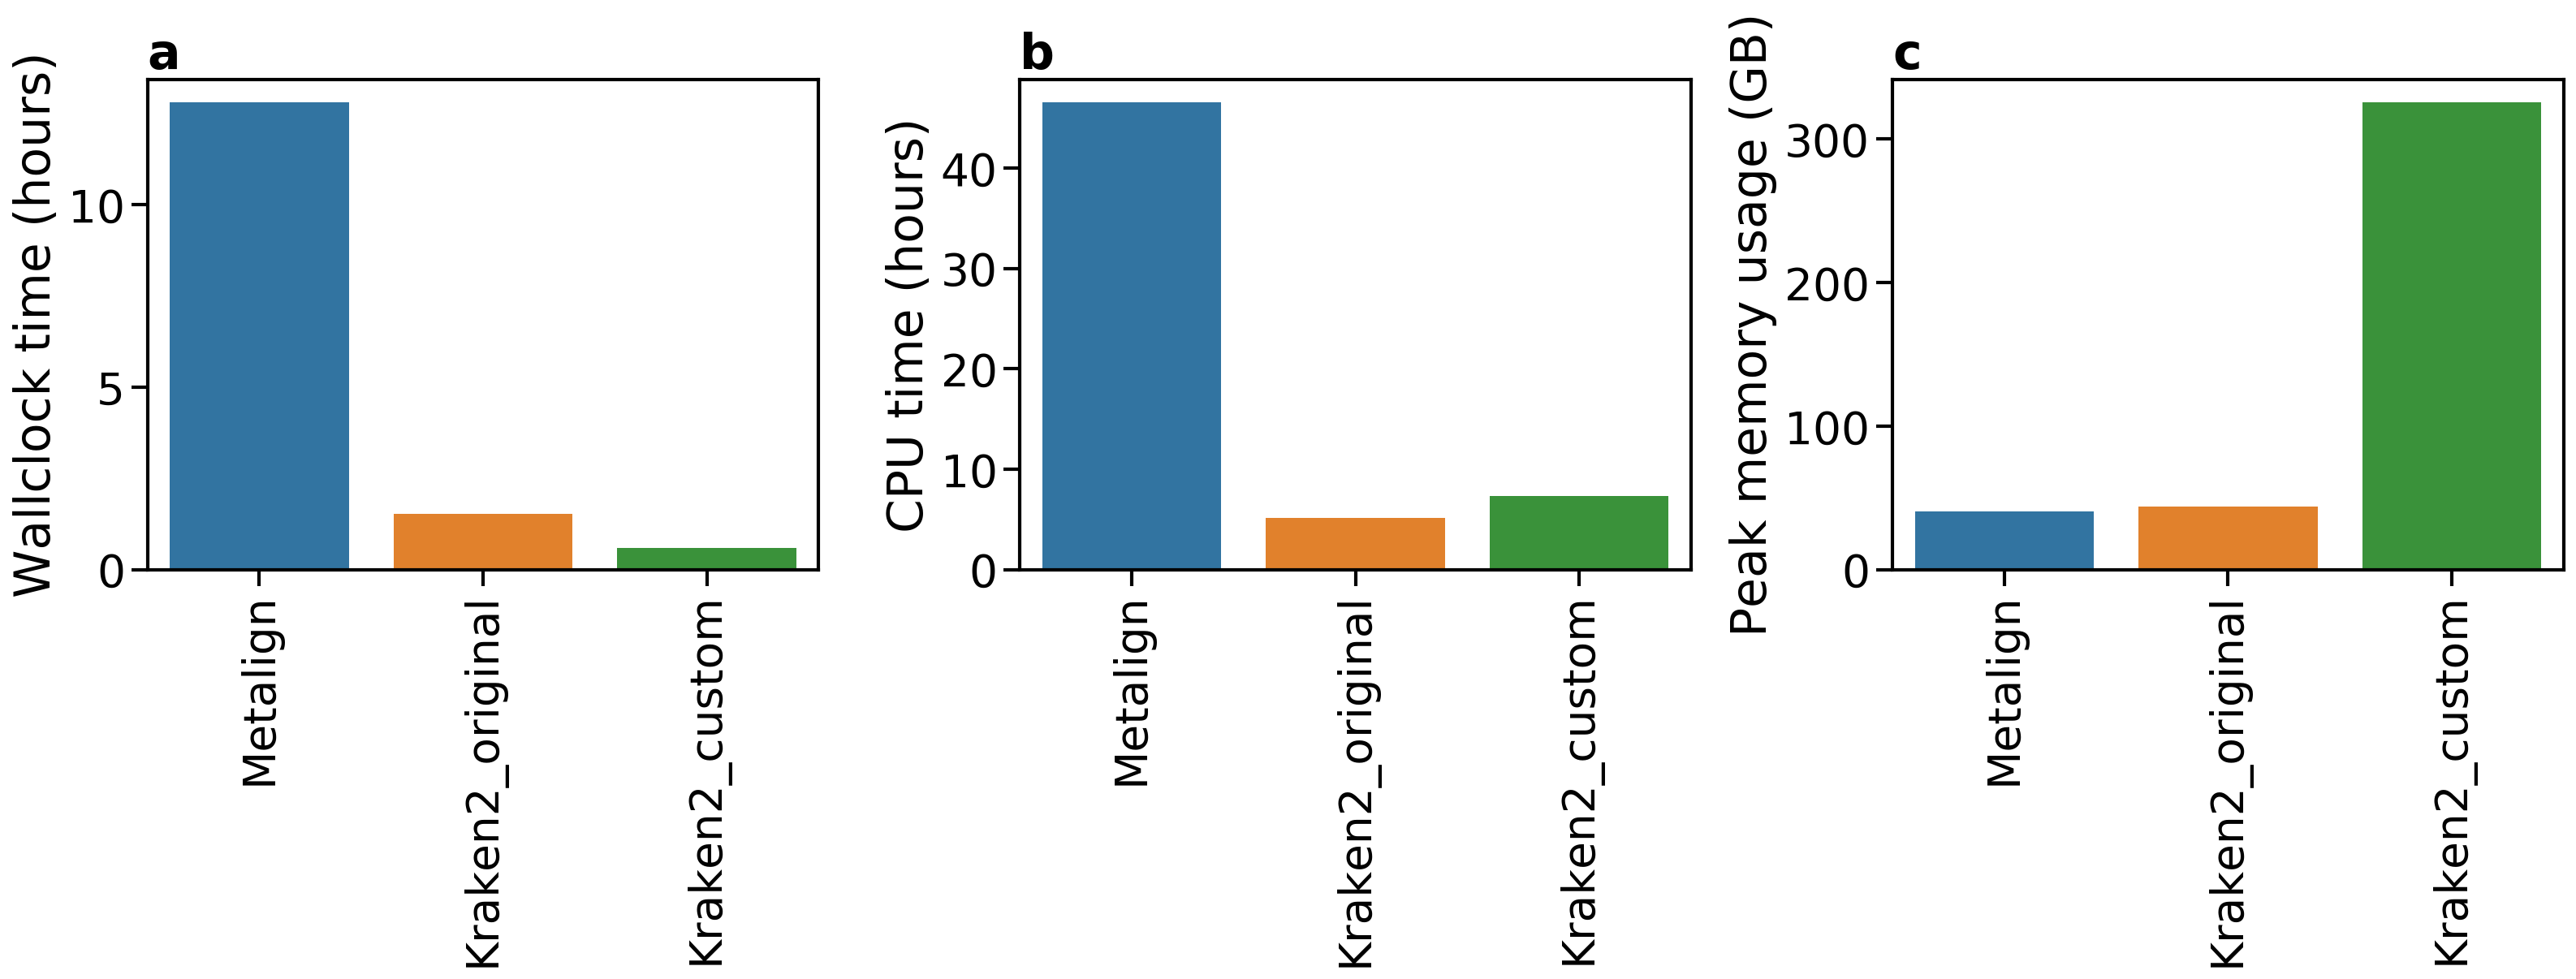

In [81]:
sns.set_context("talk", font_scale=1.5)
figure(num=None, figsize=(24, 5), dpi=160, facecolor='w', edgecolor='k')
plt.subplots_adjust(wspace = 0.3)
methods = list(custom_timing_mem.index)

plt.subplot(1, 3, 1)
ax = sns.barplot(x=methods, y=custom_timing_mem['Wallclock time'].tolist())
plt.xticks(rotation=90)
#plt.yscale('log')
plt.ylabel('Wallclock time (hours)')
ax.set_title('a', loc='left', fontweight='bold')

plt.subplot(1, 3, 2)
ax = sns.barplot(x=methods, y=custom_timing_mem['CPU time'].tolist())
plt.xticks(rotation=90)
#plt.yscale('log')
plt.ylabel('CPU time (hours)')
ax.set_title('b', loc='left', fontweight='bold')

plt.subplot(1, 3, 3)
ax = sns.barplot(x=methods, y=custom_timing_mem['Max Memory Usage (GB)'].tolist())
plt.xticks(rotation=90)
plt.ylabel('Peak memory usage (GB)')
ax.set_title('c', loc='left', fontweight='bold')

plt.savefig("figures/custom_timing_mem.png", bbox_inches='tight')

In [6]:
thread_wallclock_timing = pd.read_csv('plot_inputs/thread_scaling_wallclock_time.txt', sep='\t', index_col=0).T
thread_wallclock_timing

,Metalign,MEGAN+DIAMOND
4,0.589094,28.354119
8,0.300761,14.336483
16,0.297811,9.199333
32,0.296447,6.798100


In [7]:
thread_cpu_timing = pd.read_csv('plot_inputs/thread_scaling_cpu_time.txt', sep='\t', index_col=0).T
thread_cpu_timing

,Metalign,MEGAN+DIAMOND
4,0.689033,110.353819
8,0.691444,106.355542
16,0.730119,125.658758
32,0.820169,163.136894


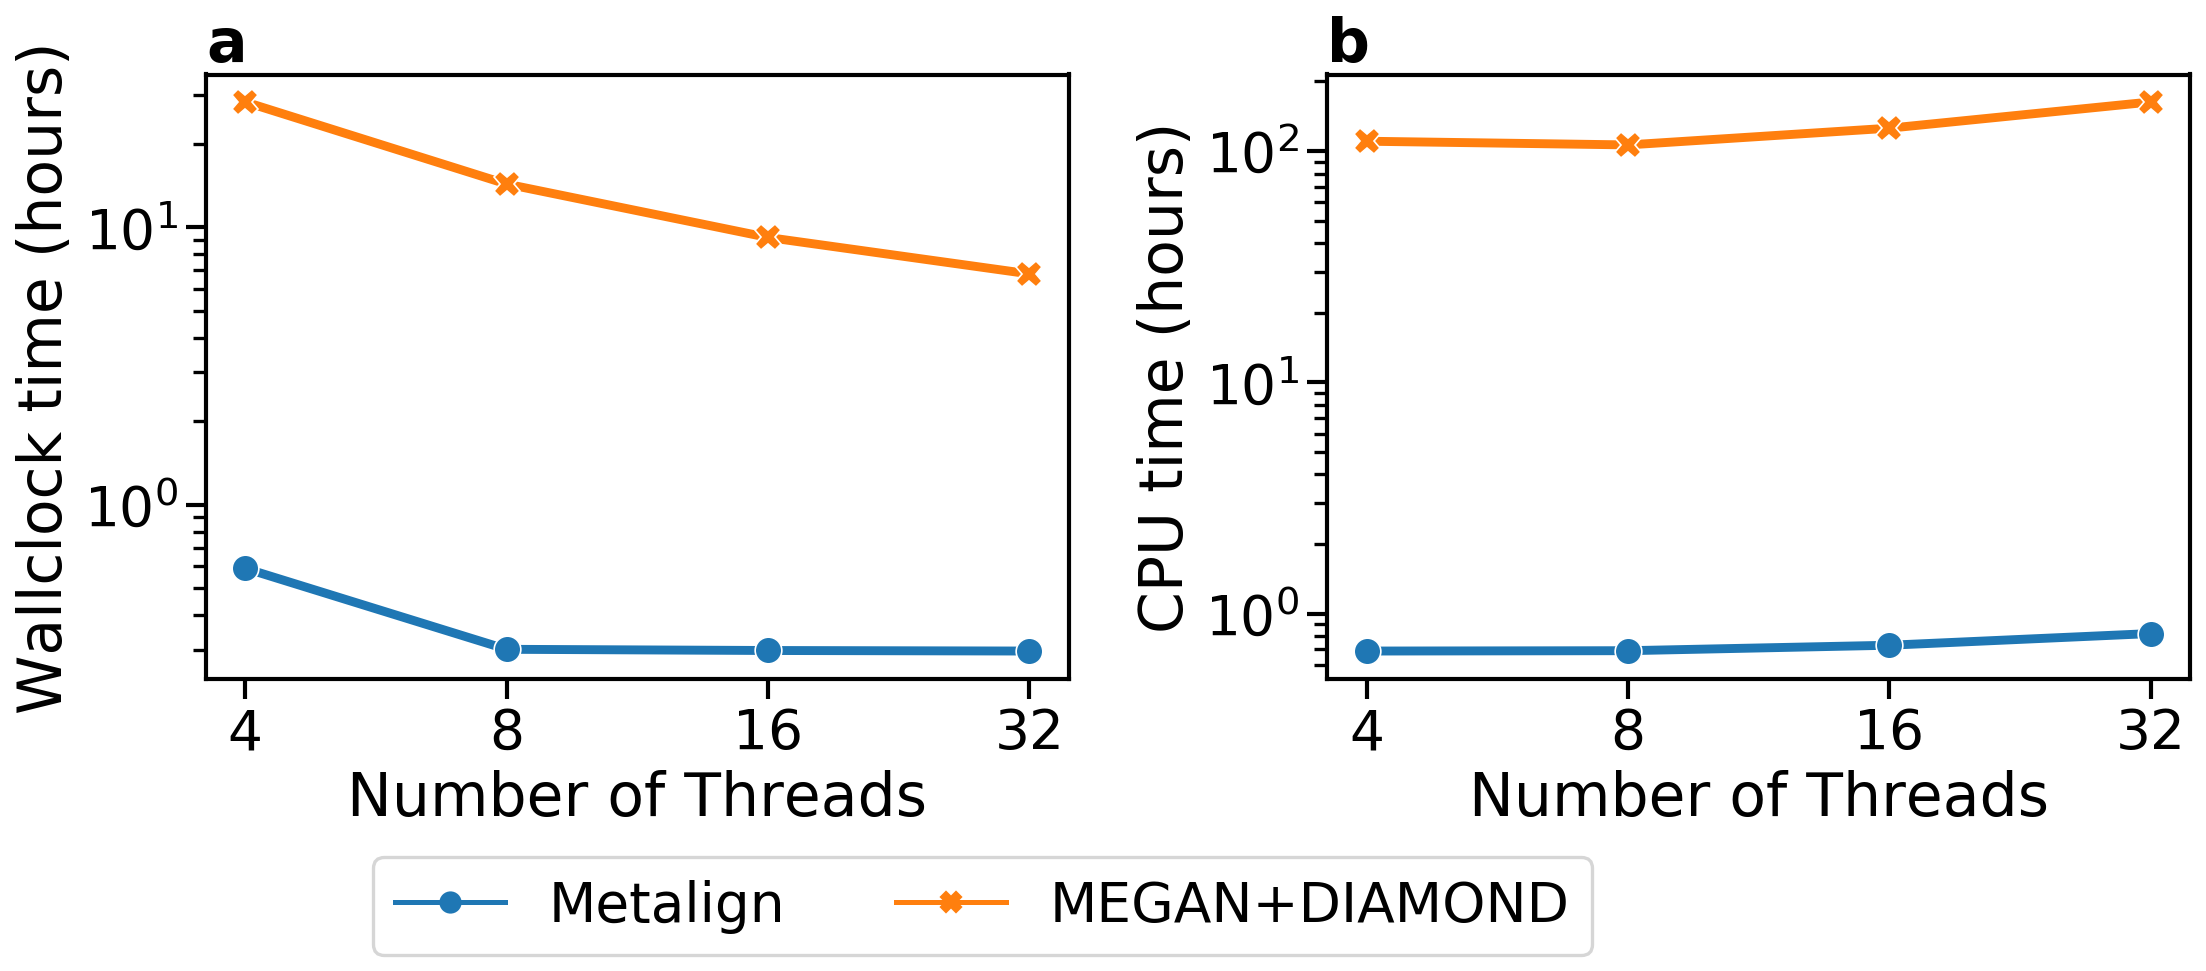

In [12]:
sns.set_context("talk", font_scale=1.5)
figure(num=None, figsize=(16, 5), dpi=160, facecolor='w', edgecolor='k')
plt.subplots_adjust(wspace = 0.3)

plt.subplot(1, 2, 1)
ax = sns.lineplot(data=thread_wallclock_timing, linewidth=4, markersize=12, sort=False, dashes=False, markers=True)
ax.set(xlabel="Number of Threads", ylabel="Wallclock time (hours)")
plt.yscale('log')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.get_legend().remove()
ax.set_title('a', loc='left', fontweight='bold')

plt.subplot(1, 2, 2)
ax = sns.lineplot(data=thread_cpu_timing, linewidth=4, markersize=12, sort=False, dashes=False, markers=True)
ax.set(xlabel="Number of Threads", ylabel="CPU time (hours)")
plt.yscale('log')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax.get_legend().remove()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 1.0, box.height * 1.0])
ax.legend(loc='upper center', bbox_to_anchor=(-0.4, -0.25), ncol=4)
ax.set_title('b', loc='left', fontweight='bold')

plt.savefig("figures/thread_scaling_timing_memory.png", bbox_inches='tight')